# Code for "The optimist-pessimist ping-pong"

This IPython notebook was written to generate illustrations for this blog post: [https://modelingbehavior.netlify.app/posts/2020_distr_rl/](https://modelingbehavior.netlify.app/posts/2020_distr_rl/)

It makes use of the class `DistrRLDemo` implemented in `distr_rl_demo.py` in this repository:

In [1]:
from distr_rl_demo import DistrRLDemo

`DistrRLDemo` is a demo implementation of distributional reinforcement learning, as described in fuller detail in for example ([Dabney et al., 2019](https://doi.org/10.1038/s41586-019-1924-6); see also [this blog post](https://deepmind.com/blog/article/Dopamine-and-temporal-difference-learning-A-fruitful-relationship-between-neuroscience-and-AI)). The implementation in `DistrRLDemo` estimates quantiles (not expectiles), by using the learning rule:

$$
V_i(t+1) = \left\{ 
    \begin{array}
        \; V_i(t) + \alpha_i^+ \cdot \mathrm{sign} [\delta_i(t)] & \mbox{if } \delta_i(t) \geq 0 \\
        V_i(t) + \alpha_i^- \cdot \mathrm{sign} [\delta_i(t)] & \mbox{if } \delta_i(t) < 0 \\
    \end{array} \right.
$$

where $V_i(t)$ is the expectation of the $i$:th estimator at time step $t$, $\delta(t)$ is the prediction error of the same estimator, compared to the observed value $V_{\mathrm{obs}}(t)$ at the same time step:

$$
\delta_i(t) = V_{\mathrm{obs}}(t) - V_i(t)
$$

The values of the learning rates $\alpha_i^+$ and $\alpha_i^-$ for positive and negative prediction errors will cause estimator $i$ to converge to the quantile $\tau_i$ of the distribution of $V_{\mathrm{obs}}(t)$:

$$
\tau_i = \frac{\alpha_i^+}{\alpha_i^+ + \alpha_i^-}
$$

`DistrRLDemo` can be used to estimate any set of quantiles of any number of distributions consisting of any number of gaussians, and it also has some methods for making a couple of different plots and corresponding animated GIFs. For example uses, see the code further below showing how the illustrations for the blog post were generated.

Here is an interactive example with three gaussians in the distribution (`mu`s and `sigma`s are the means and standard deviations of the gaussians); click "Run Interact" after setting the sliders as you want them:

In [2]:
import matplotlib.pyplot as plt
from ipywidgets import interact_manual

def run_rl_demo(mu1 = 1, mu2 = 5, mu3 = 20, sigma1 = 1, sigma2 = 2, sigma3 = 5, 
        n_estimators = 5,  learn_rate = 0.1, n_samples = 1000, 
        show_pdf = True, show_cdf = True, show_quantiles = True):
    distr_RL = DistrRLDemo([(mu1, mu2, mu3)], [(sigma1, sigma2, sigma3)], 
        estimators = n_estimators, learn_rate = learn_rate, n_samples = n_samples)
    distr_RL.set_plot_settings(plot_pdf = show_pdf, plot_cdf = show_cdf, 
        plot_quantiles = show_quantiles, plot_only_zero_xtick = False)
    
    fig = plt.figure(figsize = (5, 7))
    axs = fig.subplots(2, 1, sharex = True)
    distr_RL.plot_snapshot(axes = axs[0])
    distr_RL.plot_estimator_trajectories(axes = axs[1])
    axs[0].set_ylabel('Probability density')
    axs[0].set_title('Observed distribution')
    axs[1].set_xlabel('Observed (and estimated) quantity')
    axs[1].set_ylabel('Time steps (= no of observations)')
    axs[1].set_title('Estimator expectations')
    plt.tight_layout()

mu_slider = (-20, 20, 0.1)
sigma_slider = (0, 10, 0.1)
interact_manual(run_rl_demo, 
    mu1 = mu_slider, mu2 = mu_slider, mu3 = mu_slider, 
    sigma1 = sigma_slider, sigma2 = sigma_slider, sigma3 = sigma_slider, 
    n_estimators = (1, 10), learn_rate = (0.01, 1, 0.01), 
    n_samples = (100, 10000, 100), 
    show_pdf = True, show_cdf = False, show_quantiles = True)

interactive(children=(FloatSlider(value=1.0, description='mu1', max=20.0, min=-20.0), FloatSlider(value=5.0, d…

<function __main__.run_rl_demo(mu1=1, mu2=5, mu3=20, sigma1=1, sigma2=2, sigma3=5, n_estimators=5, learn_rate=0.1, n_samples=1000, show_pdf=True, show_cdf=True, show_quantiles=True)>

## Code for generating the figures in the blog post

First just some constants defining the distributions used in the illustrations:

In [3]:
import random

MUS_A = (1,)
SIGMAS_A = (2,) 
COLOR_A = 'purple'
MUS_B = (0,)
SIGMAS_B = (2,) 
COLOR_B = 'orange'
MUS_C = (-3, 5)
SIGMAS_C = (1.7, 1.7)
COLOR_C = 'green'

And now a snippet of code for each figure / animation:

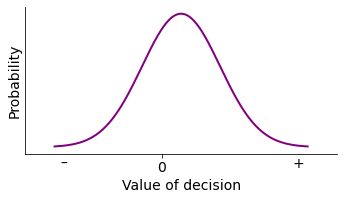

In [5]:
distr_RL = DistrRLDemo([MUS_A], [SIGMAS_A], estimators=1, learn_rate=1, n_samples=1)
distr_RL.set_plot_settings(plot_pdf = True, plot_samples = False, plot_ests = False, 
    plot_xticks = True, plot_yticks = False, 
    plot_xlabel = 'Value of decision', plot_ylabel = 'Probability', distr_colors = (COLOR_A,))
fig = plt.figure(figsize=(5, 3))
ax = fig.subplots()
distr_RL.plot_snapshot(axes = ax)
TEXTY = -.015
plt.text(1 + 4*2 - 2, TEXTY, '+', verticalalignment = 'top', horizontalalignment = 'center')
plt.text(1 - 4*2 + 2, TEXTY, '–', verticalalignment = 'top', horizontalalignment = 'center')
plt.tight_layout()
plt.savefig('onegaussian.png')

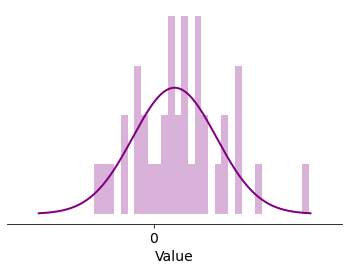

In [10]:
random.seed(0)
distr_RL = DistrRLDemo([MUS_A], [SIGMAS_A], estimators=1, learn_rate=1, n_samples=40)
distr_RL.set_plot_settings(plot_pdf = True, plot_samples = True, plot_ests = False, \
    plot_xticks = True, plot_yticks = False, plot_xlabel = 'Value', distr_colors = (COLOR_A,))
#distr_RL.plot_snapshot()
distr_RL.save_gif('onegaussian.gif', rl_frame_step = 2, gif_frame_rate = 5)


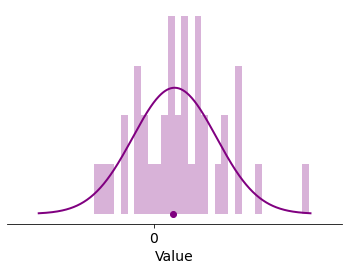

In [5]:
random.seed(0)
distr_RL = DistrRLDemo([MUS_A], [SIGMAS_A], estimators=1, learn_rate=0.1, n_samples=40)
distr_RL.set_plot_settings(plot_pdf = True, plot_samples = True, plot_ests = True, \
    plot_xticks = True, plot_yticks = False, plot_xlabel = 'Value', distr_colors = (COLOR_A,))
#distr_RL.plot_snapshot()
distr_RL.save_gif('onegaussian_oneestimator.gif', gif_frame_rate = 2)

In [8]:
random.seed(2)
distr_RL = DistrRLDemo([MUS_A, MUS_B], [SIGMAS_A, SIGMAS_B], estimators=1, learn_rate=0.1, n_samples=40)

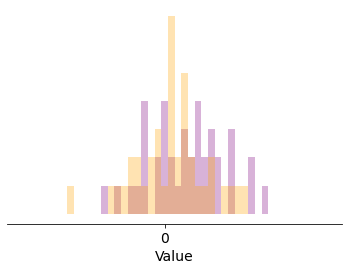

In [9]:
distr_RL.set_plot_settings(plot_pdf = False, plot_samples = True, plot_ests = False, \
    plot_xticks = True, plot_yticks = False, plot_xlabel = 'Value', distr_colors = (COLOR_A, COLOR_B))
#distr_RL.plot_snapshot()
distr_RL.save_gif('twogaussians.gif', rl_frame_step = 2, gif_frame_rate = 5)

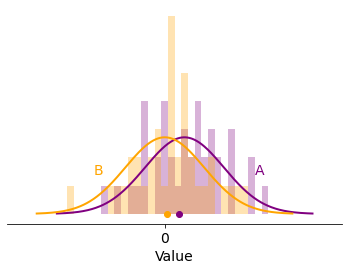

In [136]:
distr_RL.set_plot_settings(plot_pdf = True, plot_samples = True, plot_ests = True, 
    plot_xticks = True, plot_yticks = False, plot_xlabel = 'Value', distr_colors = (COLOR_A, COLOR_B), 
    distr_labels = ('A', 'B'), distr_label_xs = (1 + 2*1.8, 0 - 2*1.8), distr_label_ys = (0.2, 0.2))
#distr_RL.plot_snapshot()
distr_RL.save_gif('twogaussians_oneestimator.gif', gif_frame_rate = 4)

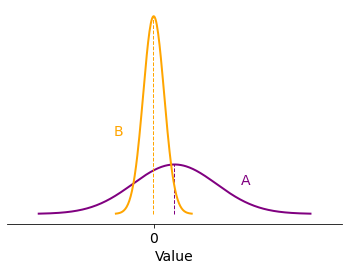

In [137]:
distr_RL = DistrRLDemo([MUS_A, MUS_B], [SIGMAS_A, (SIGMAS_B[0]/4,)], estimators=1, learn_rate=0.1, n_samples=1)
distr_RL.set_plot_settings(plot_pdf = True, plot_samples = False, plot_ests = False, 
    plot_xticks = True, plot_yticks = False, plot_xlabel = 'Value', distr_colors = (COLOR_A, COLOR_B), 
    plot_quantiles = True, 
    distr_labels = ('A', 'B'), distr_label_xs = (1 + 2*1.7, 0 - 2*1.7/2), distr_label_ys = (0.15, 0.4))
distr_RL.plot_snapshot()
plt.savefig('twogaussians_diffvar.png')

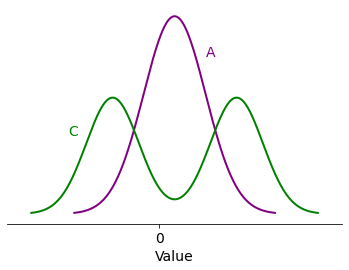

In [152]:
distr_RL = DistrRLDemo([MUS_A, MUS_C], [SIGMAS_A, SIGMAS_C], estimators=1, learn_rate=0.1, n_samples=1)
distr_RL.set_plot_settings(plot_pdf = True, plot_samples = False, plot_ests = False, 
    plot_xticks = True, plot_yticks = False, plot_xlabel = 'Value', distr_colors = (COLOR_A, COLOR_C), 
    plot_quantiles = False, 
    distr_labels = ('A', 'C'), distr_label_xs = (1 + 2*1.15, -3 - 1.7*1.5), distr_label_ys = (0.8, 0.4))
distr_RL.plot_snapshot()
plt.savefig('oneandtwogaussians.png')

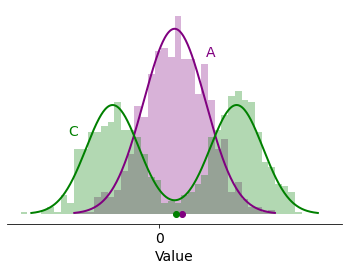

In [153]:
random.seed(0)
distr_RL = DistrRLDemo([MUS_A, MUS_C], [SIGMAS_A, SIGMAS_C], estimators=1, learn_rate=0.1, n_samples=1000)
distr_RL.set_plot_settings(plot_pdf = True, plot_samples = True, plot_ests = True, \
    plot_xticks = True, plot_yticks = False, plot_xlabel = 'Value', distr_colors = (COLOR_A, COLOR_C), \
    plot_quantiles = False, 
    distr_labels = ('A', 'C'), distr_label_xs = (1 + 2*1.15, -3 - 1.7*1.5), distr_label_ys = (0.8, 0.4))
#distr_RL.plot_estimator_trajectories()
distr_RL.save_gif('oneandtwogaussians_oneestimator.gif', rl_frame_step = 10, gif_frame_rate = 15)

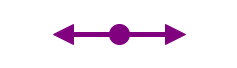

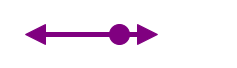

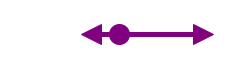

In [44]:
def plot_large_estimator(ax, x, y, l, r, c):
    MARKER_SIZE = 20
    LINE_WIDTH = 5
    ax.plot(x, y, 'o', color = c, markersize = MARKER_SIZE)
    ax.plot((x - l, x + r), (y, y), '-', color = c, lw = LINE_WIDTH)
    ax.plot(x-l, y, '<', color = c, markersize = MARKER_SIZE)
    ax.plot(x+r, y, '>', color = c, markersize = MARKER_SIZE)
    ax.axis('off')
    
fig = plt.figure(figsize = (4, 1))
ax = fig.subplots()
plot_large_estimator(ax, 0, 0, 1, 1, COLOR_A)
ax.set_xlim((-2, 2))
plt.savefig('averageestimator.png')

fig = plt.figure(figsize = (4, 1))
ax = fig.subplots()
plot_large_estimator(ax, 0, 0, 1.5, 0.5, COLOR_A)
ax.set_xlim((-2, 2))
plt.savefig('pessimistestimator.png')

fig = plt.figure(figsize = (4, 1))
ax = fig.subplots()
plot_large_estimator(ax, 0, 0, 0.5, 1.5, COLOR_A)
ax.set_xlim((-2, 2))
plt.savefig('optimistestimator.png')



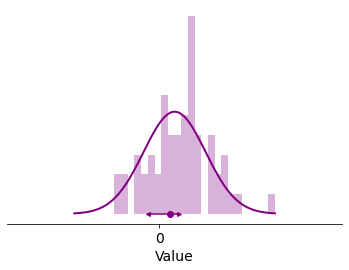

In [6]:
random.seed(0)

XLIM = (-3-4*1.7, 5+4*1.7)

distr_RL = DistrRLDemo([MUS_A], [SIGMAS_A], estimators=(.3,), learn_rate=0.2, n_samples=60)
distr_RL.set_plot_settings(plot_pdf = True, plot_samples = True, plot_ests = True, \
    plot_xticks = True, plot_yticks = False, plot_xlabel = 'Value', distr_colors = (COLOR_A, COLOR_C), \
    plot_quantiles = False, lr_plot_scaling = 5, xlim = XLIM)
#distr_RL.plot_snapshot()
#distr_RL.plot_estimator_trajectories()
distr_RL.save_gif('onegaussian_onepessimistestimator.gif', gif_frame_rate = 6)

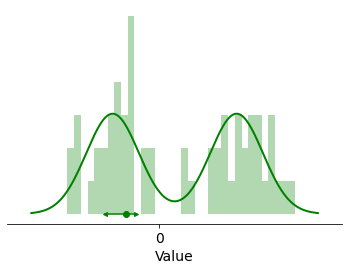

In [42]:
random.seed(0)
distr_RL = DistrRLDemo([MUS_C], [SIGMAS_C], estimators=(.3,), learn_rate=0.2, n_samples=60)
distr_RL.set_plot_settings(plot_pdf = True, plot_samples = True, plot_ests = True, \
    plot_xticks = True, plot_yticks = False, plot_xlabel = 'Value', distr_colors = (COLOR_C), \
    plot_quantiles = False, lr_plot_scaling = 5, xlim = XLIM)
#distr_RL.plot_snapshot()
#distr_RL.plot_estimator_trajectories()
distr_RL.save_gif('twogaussians_onepessimistestimator.gif', gif_frame_rate = 6)

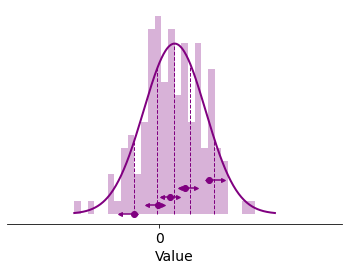

In [7]:
random.seed(1)
distr_RL = DistrRLDemo([MUS_A], [SIGMAS_A], estimators=(.1, .3, .5, .7, .9), learn_rate=0.1, n_samples=150)
distr_RL.set_plot_settings(plot_pdf = True, plot_samples = True, plot_ests = True, \
    plot_xticks = True, plot_yticks = False, plot_xlabel = 'Value', distr_colors = (COLOR_A,), \
    plot_quantiles = True, lr_plot_scaling = 5, est_spacing = 0.01, xlim = XLIM)
#distr_RL.plot_snapshot()
#distr_RL.plot_estimator_trajectories()
distr_RL.save_gif('onegaussian_fiveestimators.gif', rl_frame_step = 2, gif_frame_rate = 10)

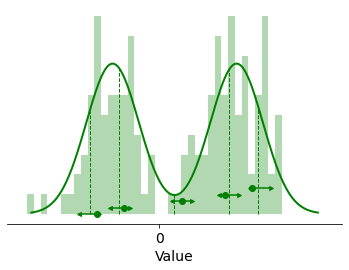

In [170]:
random.seed(1)
distr_RL = DistrRLDemo([MUS_C], [SIGMAS_C], estimators=(.1, .3, .5, .7, .9), learn_rate=0.1, n_samples=150)
distr_RL.set_plot_settings(plot_pdf = True, plot_samples = True, plot_ests = True, \
    plot_xticks = True, plot_yticks = False, plot_xlabel = 'Value', distr_colors = (COLOR_C,), \
    plot_quantiles = True, lr_plot_scaling = 6.5, est_spacing = 0.005, xlim = XLIM)
#distr_RL.plot_snapshot()
#distr_RL.plot_estimator_trajectories()
distr_RL.save_gif('twogaussians_fiveestimators.gif', rl_frame_step = 2, gif_frame_rate = 10)